导入数据

In [ ]:
#因为出现这个错误module 'tensorflow' has no attribute 'get_default_graph'。
#这个问题源自于keras和TensorFlow的版本过高导致模块不存在或者已经更改不再兼容
#所以降级tensorflow 和 keras
#!pip uninstall tensorflow
#!pip uninstall keras
#!pip install tensorflow==1.2.0
#!pip install keras==2.0.9

Uninstalling tensorflow-2.0.0a0:
  Would remove:
    /home/mao/anaconda3/envs/test/bin/freeze_graph
    /home/mao/anaconda3/envs/test/bin/saved_model_cli
    /home/mao/anaconda3/envs/test/bin/tensorboard
    /home/mao/anaconda3/envs/test/bin/tf_upgrade_v2
    /home/mao/anaconda3/envs/test/bin/tflite_convert
    /home/mao/anaconda3/envs/test/bin/toco
    /home/mao/anaconda3/envs/test/bin/toco_from_protos
    /home/mao/anaconda3/envs/test/lib/python3.6/site-packages/tensorflow-2.0.0a0.dist-info/*
    /home/mao/anaconda3/envs/test/lib/python3.6/site-packages/tensorflow/*
Proceed (y/n)? 

In [1]:
import numpy as np
import pandas as pd
from keras.utils import np_utils #后续将label矩阵变成onehot
np.random.seed(10) #设置seed可以产生的随机数据
#Using Tensorflow backend.


Using TensorFlow backend.


In [2]:
from keras.datasets import mnist#keras有现成模块帮助加载和读取mnist 数据

In [3]:
(X_train_image,y_train_label),\
(X_test_image,y_test_label)=mnist.load_data()
#Downloading data from http://s3.amazonaws.com/img-datasets/mnist.pkl.gz

In [4]:
#读取数据


In [5]:
#看数据项数
print('train data=',len(X_train_image))
print('test data=',len(X_test_image))

train data= 60000
test data= 10000


In [6]:
#查看训练数据
print('X_train_image:',X_train_image.shape)
print('y_train_label:',y_train_label.shape)

X_train_image: (60000, 28, 28)
y_train_label: (60000,)


In [7]:
#定义plot_image函数显示数字图像
import matplotlib.pyplot as plt
def plot_image(image):
    #设置图形大小
    fig=plt.gcf()
    fig.set_size_inches(2,2)
    #用plt.imshow显示图形，传入参数是28*28的图形，cmap参数设置为binary，用黑白灰显示
    plt.imshow(image,cmap='binary')
    plt.show()

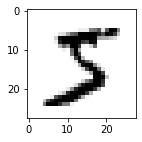

In [8]:
#查看第0个数字图像
plot_image(X_train_image[0])

In [9]:
#查看第0项label数据
y_train_label[0]

5

In [10]:
#查看多项训练数据image和label
#创建plot_images_labels_prediction 函数，显示多项
import matplotlib.pyplot as plt
#num要显示的数据项数，默认是10，不超过25
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    #设置显示图像大小
    fig=plt.gcf()
    fig.set_size_inches(12,14)
    if num>25:num=25
    for i in range(0,num):
        ax=plt.subplot(5,5,1+i)
        ax.imshow(images[idx],cmap='binary')
        title='label='+str(labels[idx])
        #如果传入了预测结果
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx])
        #设置标题                
        ax.set_title(title,fontsize=10)
        #设置不显示刻度
        ax.set_xticks([]);ax.set_yticks([])
        #读取下一项
        idx+=1
    plt.show()
        

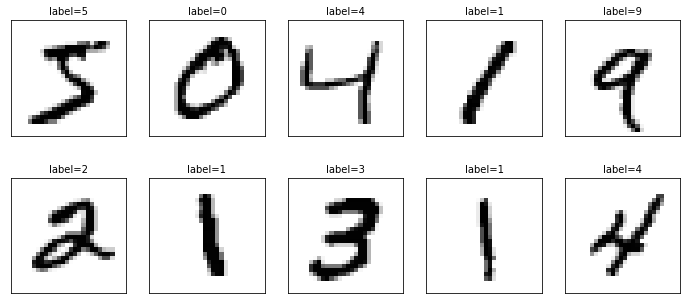

In [11]:
#查看训练数据前十项数据
#目前还没预测所以传参的prediction是空list[]
plot_images_labels_prediction(X_train_image,y_train_label,[],0,10)

In [12]:
#查看test测试数据
print('X_test_image:',X_test_image.shape)
print('y_test_label:',y_test_label.shape)

X_test_image: (10000, 28, 28)
y_test_label: (10000,)


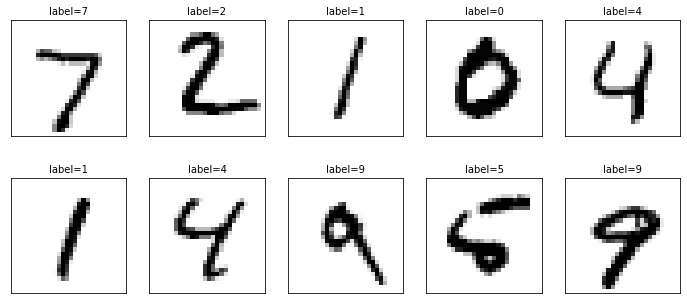

In [13]:
#显示前十项测试数据
plot_images_labels_prediction(X_test_image,y_test_label,[],0,10)

In [14]:
#多层感知器模型数据预处理
#要建立multilayer perceptron 必须先将images 和label的内容进行预预处理

In [15]:
#feature数据预处理
##首先将28*28数字图像转化为1维向量，转为float
##数字图像image的数字标准化
print('X_train_image:',X_train_image.shape)
print('X_test_image:',X_test_image.shape)

X_train_image: (60000, 28, 28)
X_test_image: (10000, 28, 28)


In [16]:
x_train=X_train_image.reshape(60000,784).astype('float32')
x_test=X_test_image.reshape(10000,784).astype('float32')

In [17]:
print('x_train:',x_train.shape)
print('x_test:',x_test.shape)

x_train: (60000, 784)
x_test: (10000, 784)


In [18]:
#查看image图像内容
x_train[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [19]:
X_train_image[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [20]:
#将image的数字标准化
x_train_normalize=x_train/255
x_test_normalize=x_test/255

In [21]:
#查看标准化后的结果
x_train_normalize[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [22]:
#label数据预处理
#查看原来字段
y_train_label[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [23]:
#进行one-hot encoding转换
y_trainonehot=np_utils.to_categorical(y_train_label)
y_testonehot=np_utils.to_categorical(y_test_label)

In [24]:
#查看转化之后
y_trainonehot[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [25]:
#建立模型
from keras.models import Sequential
from keras.layers import Dense

In [26]:
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [28]:
#建立sequential 模型，后续只需要使用model.add()方法将各个神经网络层加入模型即可
model=Sequential()

In [31]:
#建立输入层和隐含层
model.add(Dense(units=256,
                input_dim=784,
                kernel_initializer='normal',
                activation='relu'))
#建立输出层
model.add(Dense(units=10,
                kernel_initializer='normal',
                activation='softmax'))

In [32]:
#查看模型摘要
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________
None


In [34]:
#进行训练
#训练之前需要用compile方法对训练模型进行设置
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy'])
#loss设置损失函数用交叉熵
#optimizer设置训练，用adam优化器可以使训练更加收敛，并提高准确率
#metrics设置评估模型的方式是准确率

In [35]:
train_history=model.fit(x=x_train_normalize,
                        y=y_trainonehot,
                        validation_split=0.2,
                        epochs=10,
                        batch_size=200,
                        verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 3s - loss: 0.3842 - acc: 0.8939 - val_loss: 0.1691 - val_acc: 0.9514
Epoch 2/10
 - 2s - loss: 0.1432 - acc: 0.9572 - val_loss: 0.1213 - val_acc: 0.9635
Epoch 3/10
 - 3s - loss: 0.0951 - acc: 0.9714 - val_loss: 0.1019 - val_acc: 0.9704
Epoch 4/10
 - 2s - loss: 0.0685 - acc: 0.9793 - val_loss: 0.0999 - val_acc: 0.9705
Epoch 5/10
 - 2s - loss: 0.0513 - acc: 0.9844 - val_loss: 0.0887 - val_acc: 0.9718
Epoch 6/10
 - 3s - loss: 0.0383 - acc: 0.9886 - val_loss: 0.0802 - val_acc: 0.9774
Epoch 7/10
 - 2s - loss: 0.0280 - acc: 0.9914 - val_loss: 0.0788 - val_acc: 0.9769
Epoch 8/10
 - 3s - loss: 0.0212 - acc: 0.9937 - val_loss: 0.0744 - val_acc: 0.9793
Epoch 9/10
 - 2s - loss: 0.0153 - acc: 0.9956 - val_loss: 0.0805 - val_acc: 0.9785
Epoch 10/10
 - 2s - loss: 0.0129 - acc: 0.9962 - val_loss: 0.0867 - val_acc: 0.9766


In [36]:
#训练过程存储在train-history变量中，
#validation是训练和验证数据集的比例 0.2。训练数据60000中的80%用作训练，20%作为验证、
#epoch是训练周期次数
#batch_size是每一批次的项数
#verbose=2 设置显示训练过程
#以上代码一共执行了10个训练周期，每一个周期进行了48000/200=240个批次进行训练，每个批次是200个数据。
#每一个周期的训练完成后，会计算这个训练周期的准确率和误差，并且在train_history里面新增一项数据记录

In [38]:
#建立show_train_history显示训练过程
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('eporch')
    plt.legend(['train','validation'],loc='upper left')#显示图例，位置在左上角
    plt.show()

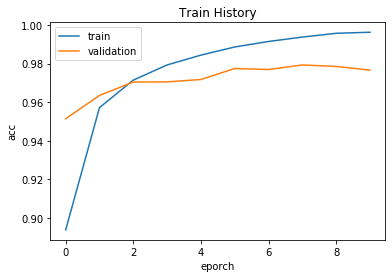

In [42]:
show_train_history(train_history,'acc','val_acc')

In [43]:
#训练数据的准确率一直增加，而验证的准确率一直没有增加，可能是过度拟合的现象

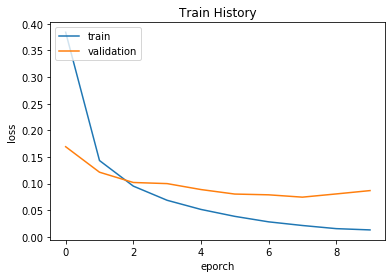

In [44]:
show_train_history(train_history,'loss','val_loss')

In [45]:
#以测试数据评估模型准确率


In [51]:
#评估模型准确率
scores=model.evaluate(x_test_normalize,y_testonehot)#评估后的准确率会存储在scores中

10000/10000 [==============================] - 1s 58us/step


In [52]:
print()
print('accuracy=',scores[1])


accuracy= 0.9768


In [54]:
#进行预测
prediction=model.predict_classes(x_test)

10000/10000 [==============================] - 1s 51us/step


In [55]:
#预测结果
prediction

array([7, 2, 1, ..., 4, 5, 6])

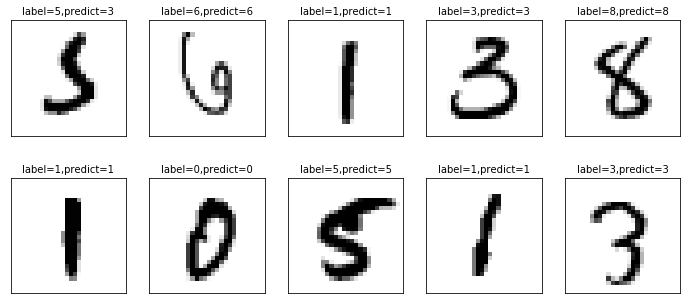

In [59]:
#显示10项预测结果
plot_images_labels_prediction(X_test_image,y_test_label,prediction,idx=340)
#显示340到349共10项

In [60]:
#显示混淆矩阵
#想要进一步知道所建立模型中哪些数字的预测准确率高
#在统计分类问题中，混淆矩阵也叫作误差矩阵，
#是一种特定的表格显示方式，可以让我们以可视化的方式了解有监督的学习算法的结果，
#看出算法模型是否混淆了两个类


In [61]:
#使用padnas crosstab建立混淆矩阵
import pandas as pd
pd.crosstab(y_test_label,prediction,
            rownames=['label'],
            colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,967,0,0,3,2,1,3,1,2,1
1,0,1126,2,2,0,1,2,0,2,0
2,5,1,993,11,3,0,2,4,13,0
3,0,0,0,999,0,1,0,3,3,4
4,0,0,3,1,967,0,3,1,2,5
5,3,0,0,15,1,863,5,0,4,1
6,3,3,1,1,7,4,937,0,2,0
7,1,3,7,3,3,0,0,1002,5,4
8,2,0,2,8,1,1,1,3,954,2


In [64]:
#建立真实值与预测DataFrame
#因为希望找出真实值是‘5’，但预测值是‘3’的数据
df=pd.DataFrame({'label':y_test_label,'predict':prediction})
df[:2]


,label,predict
0,7,7
1,2,2


In [65]:
#查询真实值是‘5’但预测值是‘3’的数据
#pandas DataFrame很方便可以让我们查询数据
df[(df.label==5)&(df.predict==3)]
#第一列是第n个数据,即是idx

,label,predict
340,5,3
1393,5,3
1670,5,3
2035,5,3
2526,5,3
2597,5,3
3117,5,3
3902,5,3
4271,5,3
4300,5,3


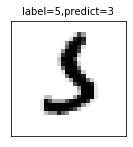

In [67]:
#查看第340项数据
plot_images_labels_prediction(X_test_image,y_test_label,prediction,idx=340,num=1)

#1隐含层增加为1000个神经元